In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import tensorflow as tf
from tensorflow.keras.metrics import RootMeanSquaredError
from keras import regularizers
from keras.layers import Dropout, Activation
from keras.callbacks import *
from keras.optimizers import Adam
from datetime import date, datetime,timedelta
# # from google.colab import files
# import io
from keras.models import load_model

Using TensorFlow backend.


In [2]:
print('Enter 1 for Accenture\n')
print('Enter 2 for Amazon\n')
print('Enter 3 for Cisco\n')
print('Enter 4 for Dell\n')
print('Enter 5 for Facebook\n')
print('Enter 6 for Uber\n')
print('Enter 7 for Verizon\n')
stock_name = int(input("Enter choice:"))
# stock_name

Enter 1 for Accenture

Enter 2 for Amazon

Enter 3 for Cisco

Enter 4 for Dell

Enter 5 for Facebook

Enter 6 for Uber

Enter 7 for Verizon

Enter choice:7


In [3]:
def load_file(stock_name):
    if stock_name == 1:
      df2 = pd.read_csv('/Users/pranavsaxena/Desktop/Python/Dissertation-Datasets/ACN.csv')  
      ticker = 'ACN'  
#       news_df = get_news(df2,ticker)
    elif stock_name == 2: 
      df2 = pd.read_csv('/Users/pranavsaxena/Desktop/Python/Dissertation-Datasets/AMZN.csv')  
      ticker = 'AMZN'
#       news_df = get_news(df2,ticker)
    elif stock_name == 3:
      df2 = pd.read_csv('/Users/pranavsaxena/Desktop/Python/Dissertation-Datasets/CSCO.csv')  
      ticker = 'CSCO'
#       news_df = get_news(df2,ticker)
    elif stock_name == 4:  
      df2 = pd.read_csv('/Users/pranavsaxena/Desktop/Python/Dissertation-Datasets/DELL.csv')  
      ticker = 'DELL'
#       news_df = get_news(df2,ticker)
    elif stock_name == 5:  
      df2 = pd.read_csv('/Users/pranavsaxena/Desktop/Python/Dissertation-Datasets/FB.csv')  
      ticker = 'FB'
#       news_df = get_news(df2,ticker)
    elif stock_name == 6:  
      df2 = pd.read_csv('/Users/pranavsaxena/Desktop/Python/Dissertation-Datasets/UBER.csv')  
      ticker = 'UBER'
#       news_df = get_news(df2,ticker)
    elif stock_name == 7:  
      df2 = pd.read_csv('/Users/pranavsaxena/Desktop/Python/Dissertation-Datasets/VZ.csv')  
      ticker = 'VZ'
#       news_df = get_news(df2,ticker)
    
#     return (news_df,ticker)
    return (df2,ticker)

In [4]:
df2,ticker = load_file(stock_name)

In [5]:
# news_df.tail()

In [6]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date',inplace=True)

In [7]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,54.750000,54.770000,54.139999,54.450001,54.450001,15285100
2020-07-14,54.430000,55.650002,54.270000,55.439999,55.439999,15683600
2020-07-15,55.610001,55.720001,55.020000,55.060001,55.060001,13903600
2020-07-16,54.869999,55.830002,54.759998,55.779999,55.779999,13477400
2020-07-17,56.000000,56.599998,55.889999,56.299999,56.299999,13506300


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


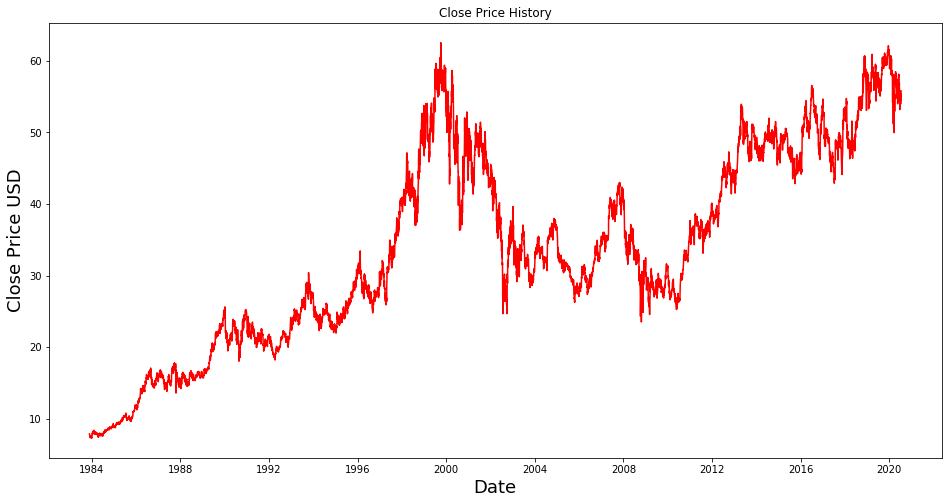

In [8]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df2['Close'][:-1], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [13]:
# create a new data frame with only 'Close column'
data = df2.filter(['Open','Close'])
dataset = data
dataset.describe()

,Open,Close
count,9240.000000,9240.000000
mean,33.645192,33.651917
std,13.666914,13.667274
min,7.321049,7.321049
25%,23.269976,23.269976
50%,32.372808,32.326156
75%,46.250000,46.279999
max,62.009998,62.502930


In [252]:
def scale_data(data):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data.values.reshape(data.shape[0], 1))
    return data, scaler

In [253]:
data,scaler = scale_data(data)

In [254]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb+1),0])
    return np.array(X),np.array(Y)

In [255]:
# look_back = 60
look_back = 6
X,y = processData(data,look_back)
print(X.shape,y.shape)

(9233, 6) (9233,)


In [256]:
def test_train_split(X,y,train_pct):

    x_train,x_test = X[:int(X.shape[0]*train_pct)],X[int(X.shape[0]*train_pct):]
    y_train,y_test = y[:int(y.shape[0]*train_pct)],y[int(y.shape[0]*train_pct):]

    return (x_train,y_train,x_test,y_test)

In [257]:
#Reshape data into (Sample,Timestep,Features) 
x_train,y_train,x_test,y_test = test_train_split(X,y,1)
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9233, 6, 1)
(0, 6, 1)
(9233,)
(0,)


In [258]:
def run_model(input):
    model =Sequential()
#     model.add(LSTM(128,return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(128,return_sequences=True, input_shape=input)) 
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences= False))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(Dense(1))

    #Complie the model
    adam = Adam(lr=0.003)
    model.compile(optimizer=adam, loss='mean_squared_error')#,metrics=[tf.keras.metrics.RootMeanSquaredError()])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                                  patience=5, min_lr=0.0009)
    callbacks = [early_stopping, reduce_lr]
    model.fit(x_train,y_train, callbacks=callbacks,batch_size=250, epochs=100)
    return model

In [259]:
model = run_model((x_train.shape[1],1))

Epoch 1/100
9233/9233 [==============================] - 3s 343us/step - loss: 0.0234
Epoch 2/100
 750/9233 [=>............................] - ETA: 2s - loss: 0.0028

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


9233/9233 [==============================] - 2s 228us/step - loss: 0.0020
Epoch 3/100
9233/9233 [==============================] - 2s 250us/step - loss: 0.0016
Epoch 4/100
9233/9233 [==============================] - 2s 226us/step - loss: 0.0013
Epoch 5/100
9233/9233 [==============================] - 2s 224us/step - loss: 0.0011
Epoch 6/100
9233/9233 [==============================] - 2s 225us/step - loss: 0.0010
Epoch 7/100
9233/9233 [==============================] - 2s 248us/step - loss: 9.2888e-04
Epoch 8/100
9233/9233 [==============================] - 2s 223us/step - loss: 8.4200e-04
Epoch 9/100
9233/9233 [==============================] - 2s 226us/step - loss: 8.3160e-04
Epoch 10/100
9233/9233 [==============================] - 2s 223us/step - loss: 7.9165e-04
Epoch 11/100
9233/9233 [==============================] - 2s 224us/step - loss: 8.0401e-04
Epoch 12/100
9233/9233 [==============================] - 2s 228us/step - loss: 6.8896e-04
Epoch 13/100
9233/9233 [===============

In [260]:
def model_save(model,ticker):
    model.save("/Users/pranavsaxena/Desktop/Python/saved_model/model_"+ticker+"open.h5")    

In [261]:
model_save(model,ticker)
print('done')

done
